# Download data from DHI Altimetry API
Altimetry data (water level, significant wave height and wind speed) obtained from satellites are very useful for validation of models as the data are available globally since 1985 and up to 12 hou . DHI has an altimetry portal with an api where you can download the data. 

In [1]:
from fmskill.data import DHIAltimetryRepository
from fmskill import TrackObservation
from mikeio import Dfs0
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
api_key = os.environ["DHI_ALTIMETRY_API_KEY"]
repo = DHIAltimetryRepository(api_key)

In [3]:
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


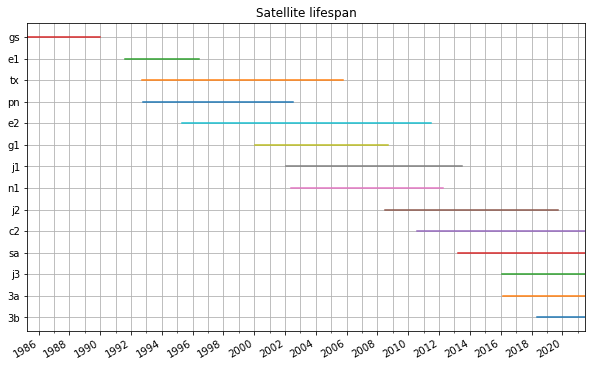

In [4]:
repo.plot_observation_stats();

In [5]:
repo.time_of_newest_data()

Timestamp('2021-06-21 08:00:21.677035')

## Temporal coverage
For a specific area and temporal selection, an overview of the temporal coverage can be obtained with the get_daily_count() method.

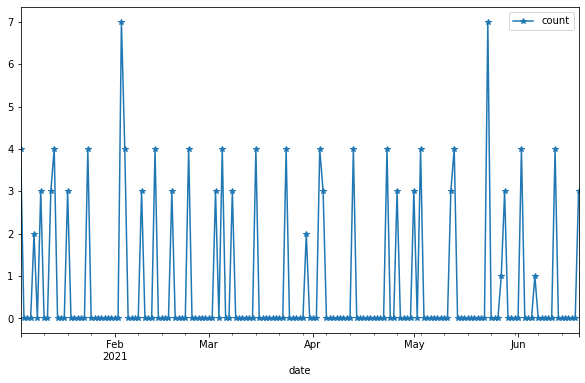

In [6]:
df = repo.get_daily_count("lon=10.9&lat=55.9&radius=10.0", start_time="2021")
df.plot(marker="*", figsize=(10,6));

## Spatial coverage
An overview of the spatial data coverage for a specified area and time period can be obtained with the get_spatial_coverage() method

In [7]:
area = "bbox=10.0,54.0,12.0,58.0"
gdf = repo.get_spatial_coverage(area, start_time="2021")

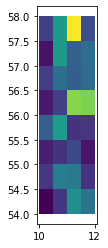

In [8]:
gdf.plot('count');

In [9]:
# Download coastline and countries from public source
import geopandas
coastline = geopandas.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_coastline.geojson")
countries = geopandas.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

In [10]:
ax = gdf.plot('count', legend=True, figsize=(8,8), legend_kwds={'label': "# obs", 'orientation': "horizontal"})
countries.plot(ax=ax)
ax.set_xlim((8,13))
ax.set_ylim((54,58.3))
ax.set_aspect(1.0 / np.cos(np.pi * 56 / 180))

NameError: name 'np' is not defined

## Download the data
The actual data is downloaded using the get_altimetry_data() method. Let's download a month's data a circle with 100km radius in the North Sea.

In [18]:
data = repo.get_altimetry_data(area="lon=2.9&lat=55.9&radius=100", start_time="2019-10-1", 
end_time="2019-11-1")
data.df.head()

Succesfully retrieved 1006 records from API in 1.76 seconds


,lon,lat,water_level,adt,wind_speed,wind_speed_abdalla,wind_speed_abdalla_adjusted,swh,swh_adjusted,distance_from_land,water_depth,satellite,quality,wl_rms,swh_rms
date,,,,,,,,,,,,,,,
2019-10-01 01:53:30.689,3.780429,55.203699,0.0077,0.0597,5.16,5.834183,5.783530,1.975,1.942423,221652.719762,-41.000000,c2,0,0.046,0.256
2019-10-01 01:53:31.633,3.770297,55.260700,0.0287,0.0654,5.21,5.886469,5.836653,1.922,1.892914,227674.772499,-33.931813,c2,0,0.048,0.333
2019-10-01 01:53:32.576,3.760148,55.317701,0.0558,0.0801,5.40,6.101864,6.055494,1.864,1.838815,233715.397905,-28.000000,c2,0,0.038,0.273
2019-10-01 01:53:33.519,3.749980,55.374701,0.0496,0.0645,5.56,6.298769,6.255549,1.962,1.930273,239773.215489,-28.000000,c2,0,0.050,0.374
2019-10-01 01:53:34.463,3.739795,55.431700,0.0752,0.0815,5.33,6.019907,5.972225,1.986,1.952707,245847.148937,-31.000000,c2,0,0.048,0.311


In [22]:
data.query_params

{'lon': '2.9',
 'lat': '55.9',
 'radius': '100',
 'start_date': '20191001',
 'end_date': '20191101'}

### Quality flag

Each data point has a quality flag: 

0. Good
1. Acceptable
2. Bad

Let's keep only the good data.

In [19]:
data.df = data.df[data.df.quality==0]

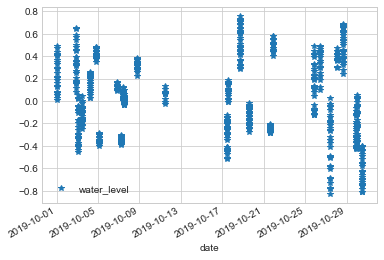

In [20]:
data.df[['water_level']].plot(style="*");

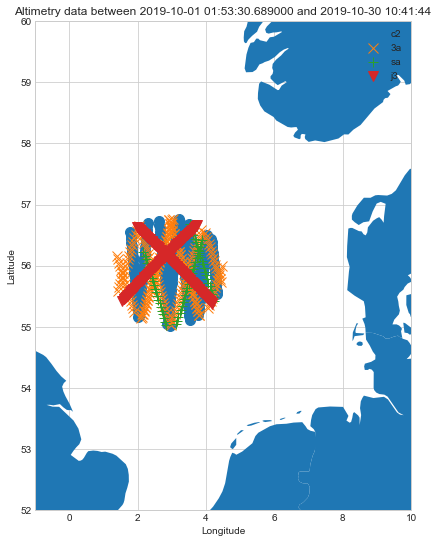

In [32]:
import matplotlib.pyplot as plt
import numpy as np
data.plot_map()
ax = plt.gca()
countries.plot(ax=ax)
ax.set_xlim((-1,10))
ax.set_ylim((52,60))
ax.set_aspect(1.0 / np.cos(np.pi * 56 / 180))